In [3]:
import numpy as np
from numpy.fft import fft, fftfreq, fftshift, ifft
import matplotlib.pyplot as plt
import scipy as sp
import sympy as smp
import imageio
from skimage.transform import radon, rescale

Fourier frequencies and corresponding x values

In [228]:
s = np.linspace(-3, 3, 1000)
x = fftshift(fftfreq(len(s), np.diff(s)[0]))

Filter for time series and correspond MTF ($x_0=0$ so these are the same)

In [239]:
filt = np.exp(-np.pi*x**2)
MTF =  np.exp(-np.pi*s**2)

Plot the MTF

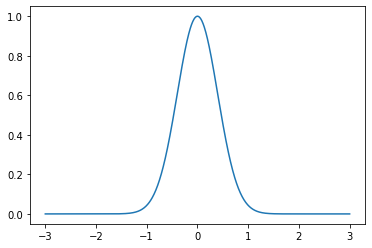

In [240]:
plt.plot(s,MTF)

In [242]:
MTF_i= np.zeros(len(P1))
MTF_i[np.abs(s)<1] = 1/P1[np.abs(s)<1]

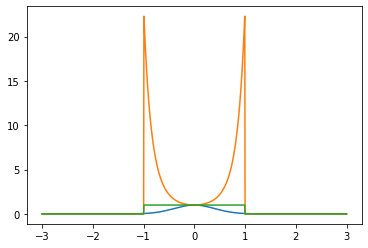

In [243]:
plt.plot(s, MTF)
plt.plot(s,MTF_i)
plt.plot(s,MTF*MTF_i)

In [244]:
def get_Metz(a):
    return MTF_i * (1-(1-np.abs(MTF)**2)**a)

In [245]:
aa = 10**np.arange(0,5)
metz = np.vectorize(get_Metz, signature='()->(n)')(aa)

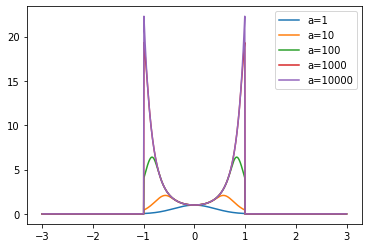

In [246]:
[plt.plot(s, met, label=f'a={a}') for a, met in zip(aa, metz)]
plt.legend()
plt.show()

Get a function to look at

In [290]:
f = np.sin(3*x) * (x/80)**2 + np.random.rand(len(x))*0.2
f_filt = np.convolve(f, filt*(np.diff(x)[0]), mode='same')

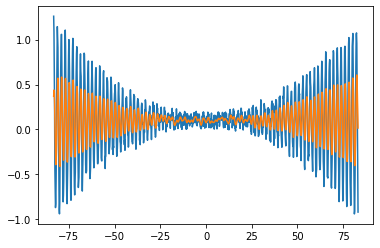

In [291]:
plt.plot(x, f)
plt.plot(x, f_filt)

In [292]:
F = fftshift(fft(f))
F_filt = fftshift(fft(f_filt))

[]

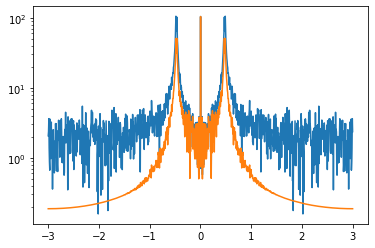

In [293]:
plt.plot(s,np.abs(F))
plt.plot(s,np.abs(F_filt))
plt.semilogy()

Correct the spectrum of $F$ by multiplying by the inverse MTF (in the bounded range)

In [294]:
F_corr = F_filt*MTF_i

[]

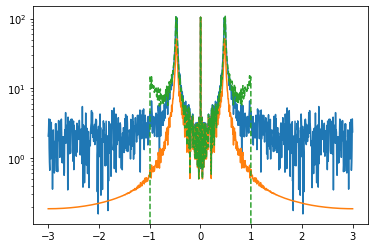

In [295]:
plt.plot(s,np.abs(F), label='Original')
plt.plot(s,np.abs(F_filt), label='Filtered')
plt.plot(s,np.abs(F_corr), ls='--', label='Corrected')
plt.semilogy()

In [296]:
f_corr_recon = ifft(fftshift(F_corr))

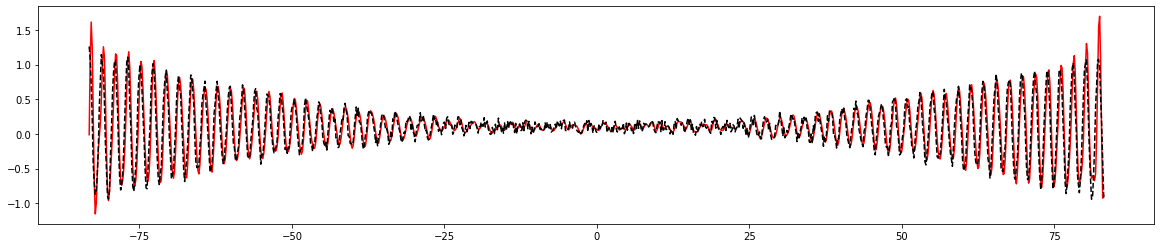

In [297]:
plt.figure(figsize=(20,4))
plt.plot(x, f_corr_recon.real, color='r', label='Corrected')
plt.plot(x, f, color='k', ls='--', label='Original')
plt.show()

With the Metz filter

In [298]:
F_corr2 = F_filt*get_Metz(10)
f_corr_recon2 = ifft(fftshift(F_corr2))

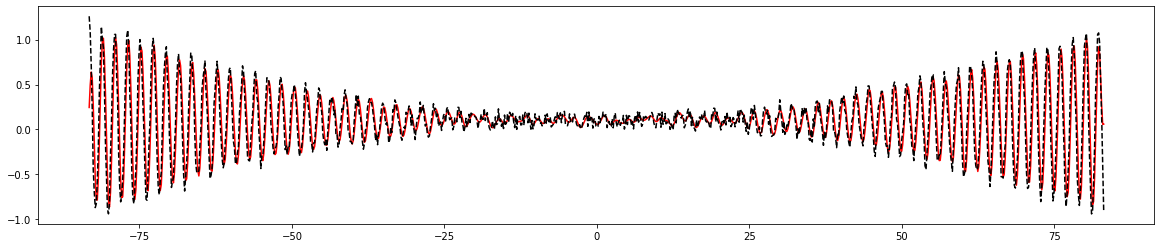

In [299]:
plt.figure(figsize=(20,4))
plt.plot(x, f_corr_recon2.real, color='r', label='Corrected')
plt.plot(x, f, color='k', ls='--', label='Original')
plt.show()

# Assignment 2

In [50]:
im = imageio.imread('a2p1.png').sum(axis=-1)
im-=1020
im = np.abs(im)

In [51]:
x = np.arange(im.shape[1])
y = np.arange(im.shape[0])
xv, yv = np.meshgrid(x,y)
center = im.shape[1]/2, im.shape[0]/2

In [52]:
im[(xv-center[0])**2 + (yv-center[1])**2 > 10000] = 0

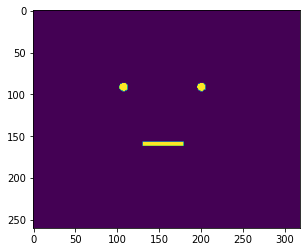

In [53]:
plt.imshow(im)

In [54]:
im_r = radon(im)

<ipython-input-54-33e958decde9>:1: UserWarning: Image dtype is not float. By default radon will assume you want to preserve the range of your image (preserve_range=True). In scikit-image 0.18 this behavior will change to preserve_range=False. To avoid this warning, explicitly specify the preserve_range parameter.
  im_r = radon(im)


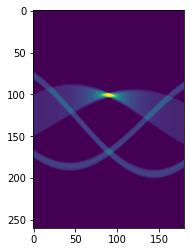

In [55]:
plt.imshow(im_r)

# Assignment 4

In [1]:
import numpy as np

In [5]:
(42.6e6)**-1 / (2e-3) / 658

1.7837521583401116e-08

In [7]:
np.linalg.inv(np.array([[1,-1],[1,-3]]))

array([[ 1.5, -0.5],
       [ 0.5, -0.5]])